# Logistic Regression Using GD

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

In [4]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

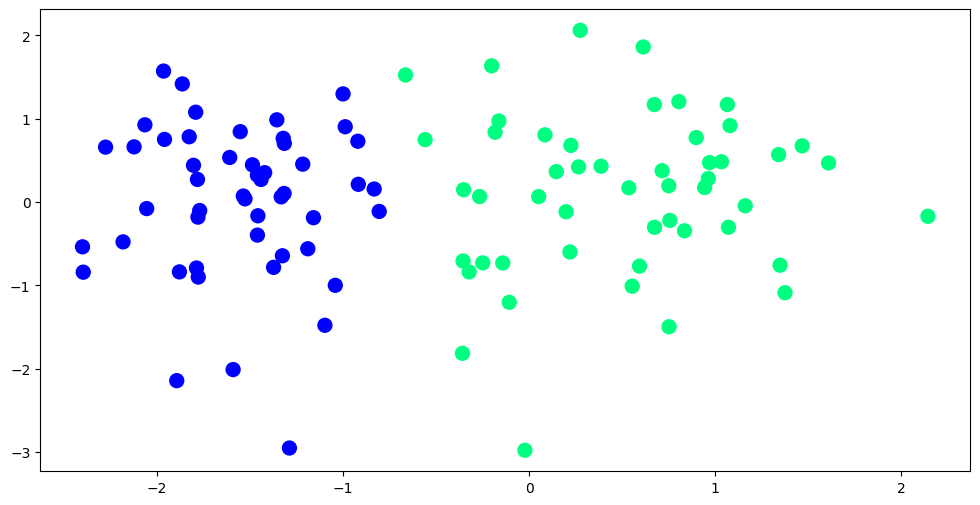

In [7]:
plt.figure(figsize=(12,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [11]:
lr=LogisticRegression(solver='sag')
lr.fit(X,y)

LogisticRegression(solver='sag')

In [12]:
lr.coef_,lr.intercept_

(array([[3.50212813, 0.02711974]]), array([2.25287771]))

In [17]:
lr.coef_[0][0]

np.float64(3.502128127291909)

In [ ]:

m = -(lr.coef_[0][0] / lr.coef_[0][1])                    
b = -(lr.intercept_[0] / lr.coef_[0][1])

In [21]:
x_in=np.linspace(-3,3,100)
y_in=m*x_in+b

In [23]:
def GD(x,y):
    x=np.insert(x,0,1,axis=1)
    w=np.ones(x.shape[1])
    lr=0.5

    for i in range(5000):
        y_hat=step(np.dot(x,w))
        w=w+lr*(np.dot((y-y_hat),x)/x.shape[0])

    return w[1:],w[0]

In [24]:
def step(z):
    return 1/(1+np.exp(-z))

In [25]:
coef_,intercept_=GD(X,y)

In [26]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [28]:
x_in1 = np.linspace(-3,3,100)
y_in1 = m*x_in1 + b

(-3.0, 2.0)

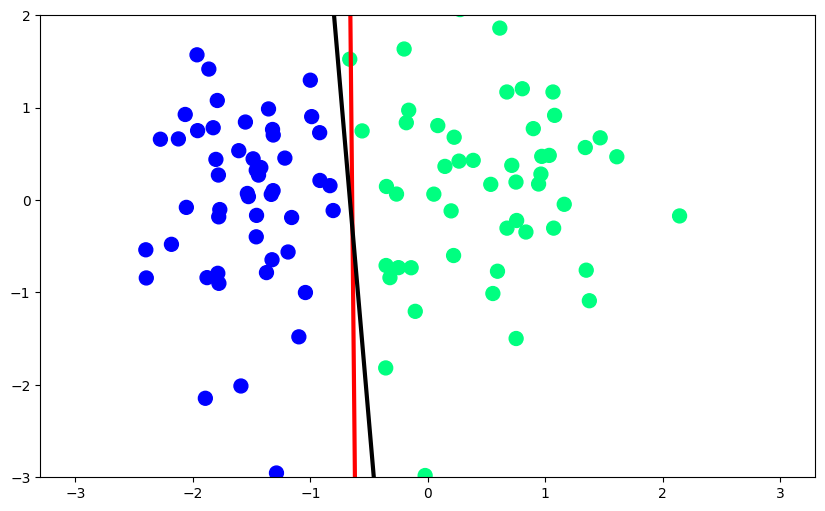

In [29]:
plt.figure(figsize=(10,6))
plt.plot(x_in,y_in,color='red',linewidth=3)
plt.plot(x_in1,y_in1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)